<a href="https://colab.research.google.com/github/dnarqq/Other/blob/main/Probability%20theory%20and%20mathematical%20statistics/%D0%94%D0%97_%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import norm


In [ ]:
print(2*(3**12))

1062882


# Задача про равномерное распределение в треугольнике

In [ ]:
#создадим две выборки из равномерного распределения на отрезке [0,1]

size = 10000

U1 = np.random.default_rng().uniform(0,1,size)

U2 = np.random.default_rng().uniform(0,1,size)

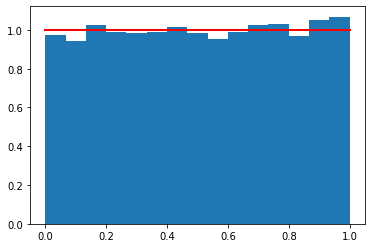

In [ ]:
count, bins, ignored = plt.hist(U1, 15, density=True)

plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

In [ ]:
#афинное преобразование треугольника с координатами [1,0] [0,1] [0, 0] в треугольник с исходными координатами (можно было решать СЛАУ, но есть и такой вариант)

def F(p1,p2,p3,  x : np.array, y : np.array):
  
  A = np.array([[0, 1, 0],
                [1, 0, 0],
                [1, 1, 1]])
  
  X1 = np.array([[p1[0], p2[0], p3[0]],
                [1    , 0    , 0],
                [1    , 1    , 1]])
  
  X2 = np.array([[p1[0], p2[0], p3[0]],
                 [0    , 1    , 0],
                 [1    , 1    , 1]])
  
  X3 = np.array([[p1[0], p2[0], p3[0]],
              [0       , 1    , 0],
              [1       , 0    , 0]])
  
  Y1 = np.array([[p1[1], p2[1], p3[1]],
                [1    , 0    , 0],
                [1    , 1    , 1]])
  
  Y2 = np.array([[p1[1], p2[1], p3[1]],
                 [0    , 1    , 0],
                 [1    , 1    , 1]])
  
  Y3 = np.array([[p1[1], p2[1], p3[1]],
              [0    , 1    , 0   ],
              [1    , 0    , 0   ]])
  
  x_ = (-1)*np.linalg.det(X1) * x + np.linalg.det(X2) * y + np.linalg.det(X3)/np.linalg.det(A)

  y_ = (-1)*np.linalg.det(Y1) * x + np.linalg.det(Y2) * y + np.linalg.det(Y3)/np.linalg.det(A)
    

  return x_, y_

In [ ]:
F([1,2], [2,6], [8,1], 0, 0)

(7.999999999999998, 1.0)

In [ ]:
F([1,2], [2,6], [8,1], 1, 0)

(1.9999999999999982, 5.999999999999999)

In [ ]:
F([1,2], [2,6], [8,1], 0, 1)

(0.9999999999999991, 2.0)

In [ ]:
#если точка попадает не в прямоугольный треугольник, отобразим её симметрично прямой x+y = 1

for i in range(size):
  if U1[i] + U2[i] > 1:
    d = abs(U1[i] + U2[i] - 1)
    U1[i] = U1[i] - d
    U2[i] = U2[i] - d

In [ ]:
#генерация случайной точки в треугольнике с заданными координатами

x, y = F([1,2], [2,6], [8,1], U1, U2)

<Figure size 432x288 with 0 Axes>

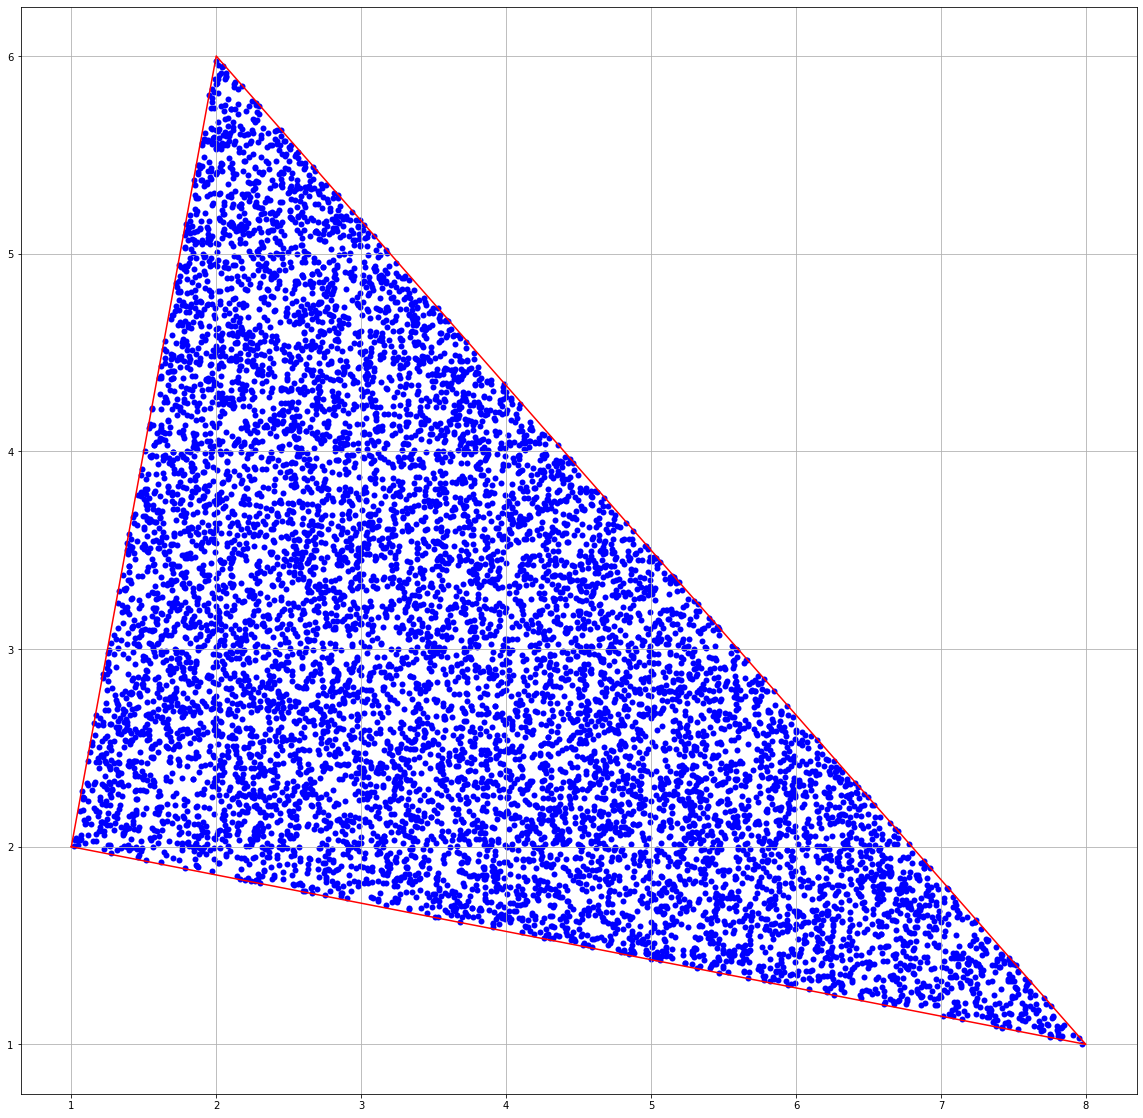

In [ ]:
#проверим

plt.clf()
plt.figure(figsize =(20, 20)) 
plt.grid()
plt.plot([1, 2, 8, 1], [2,6,1,2], color = "red")
plt.scatter(x, y, color = "blue", linewidth = 0.0001)

# Нормальное распределение

In [ ]:
size = 10000

U1 = np.random.default_rng().uniform(0,1,size)

U2 = np.random.default_rng().uniform(0,1,size)

In [ ]:
#метод Бокса-Мюллера

N = np.cos(2*np.pi*U1)*np.sqrt(-2*np.log(U2)) 

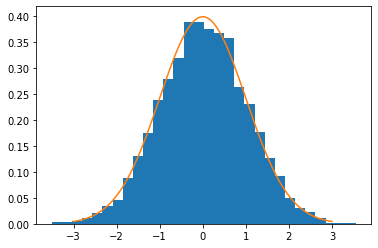

In [ ]:
count, bins, ignored = plt.hist(N, 30, density=True)

x = np.arange (-3, 3, 0.001)

plt.plot (x, norm. pdf (x, 0, 1)) 

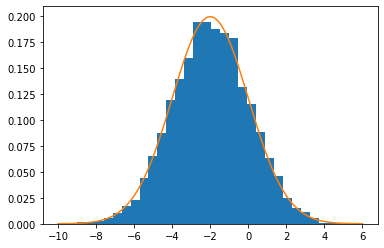

In [ ]:
#сгенерируем нормальную величину со средним -2 и отклонением 2


mean = -2

std = 2

N1 = mean + std * N

count, bins, ignored = plt.hist(N1, 30, density=True)

x = np.arange (-10, 6, 0.001)

plt.plot (x, norm. pdf (x, mean, std)) 

# Задача про случайное блуждание

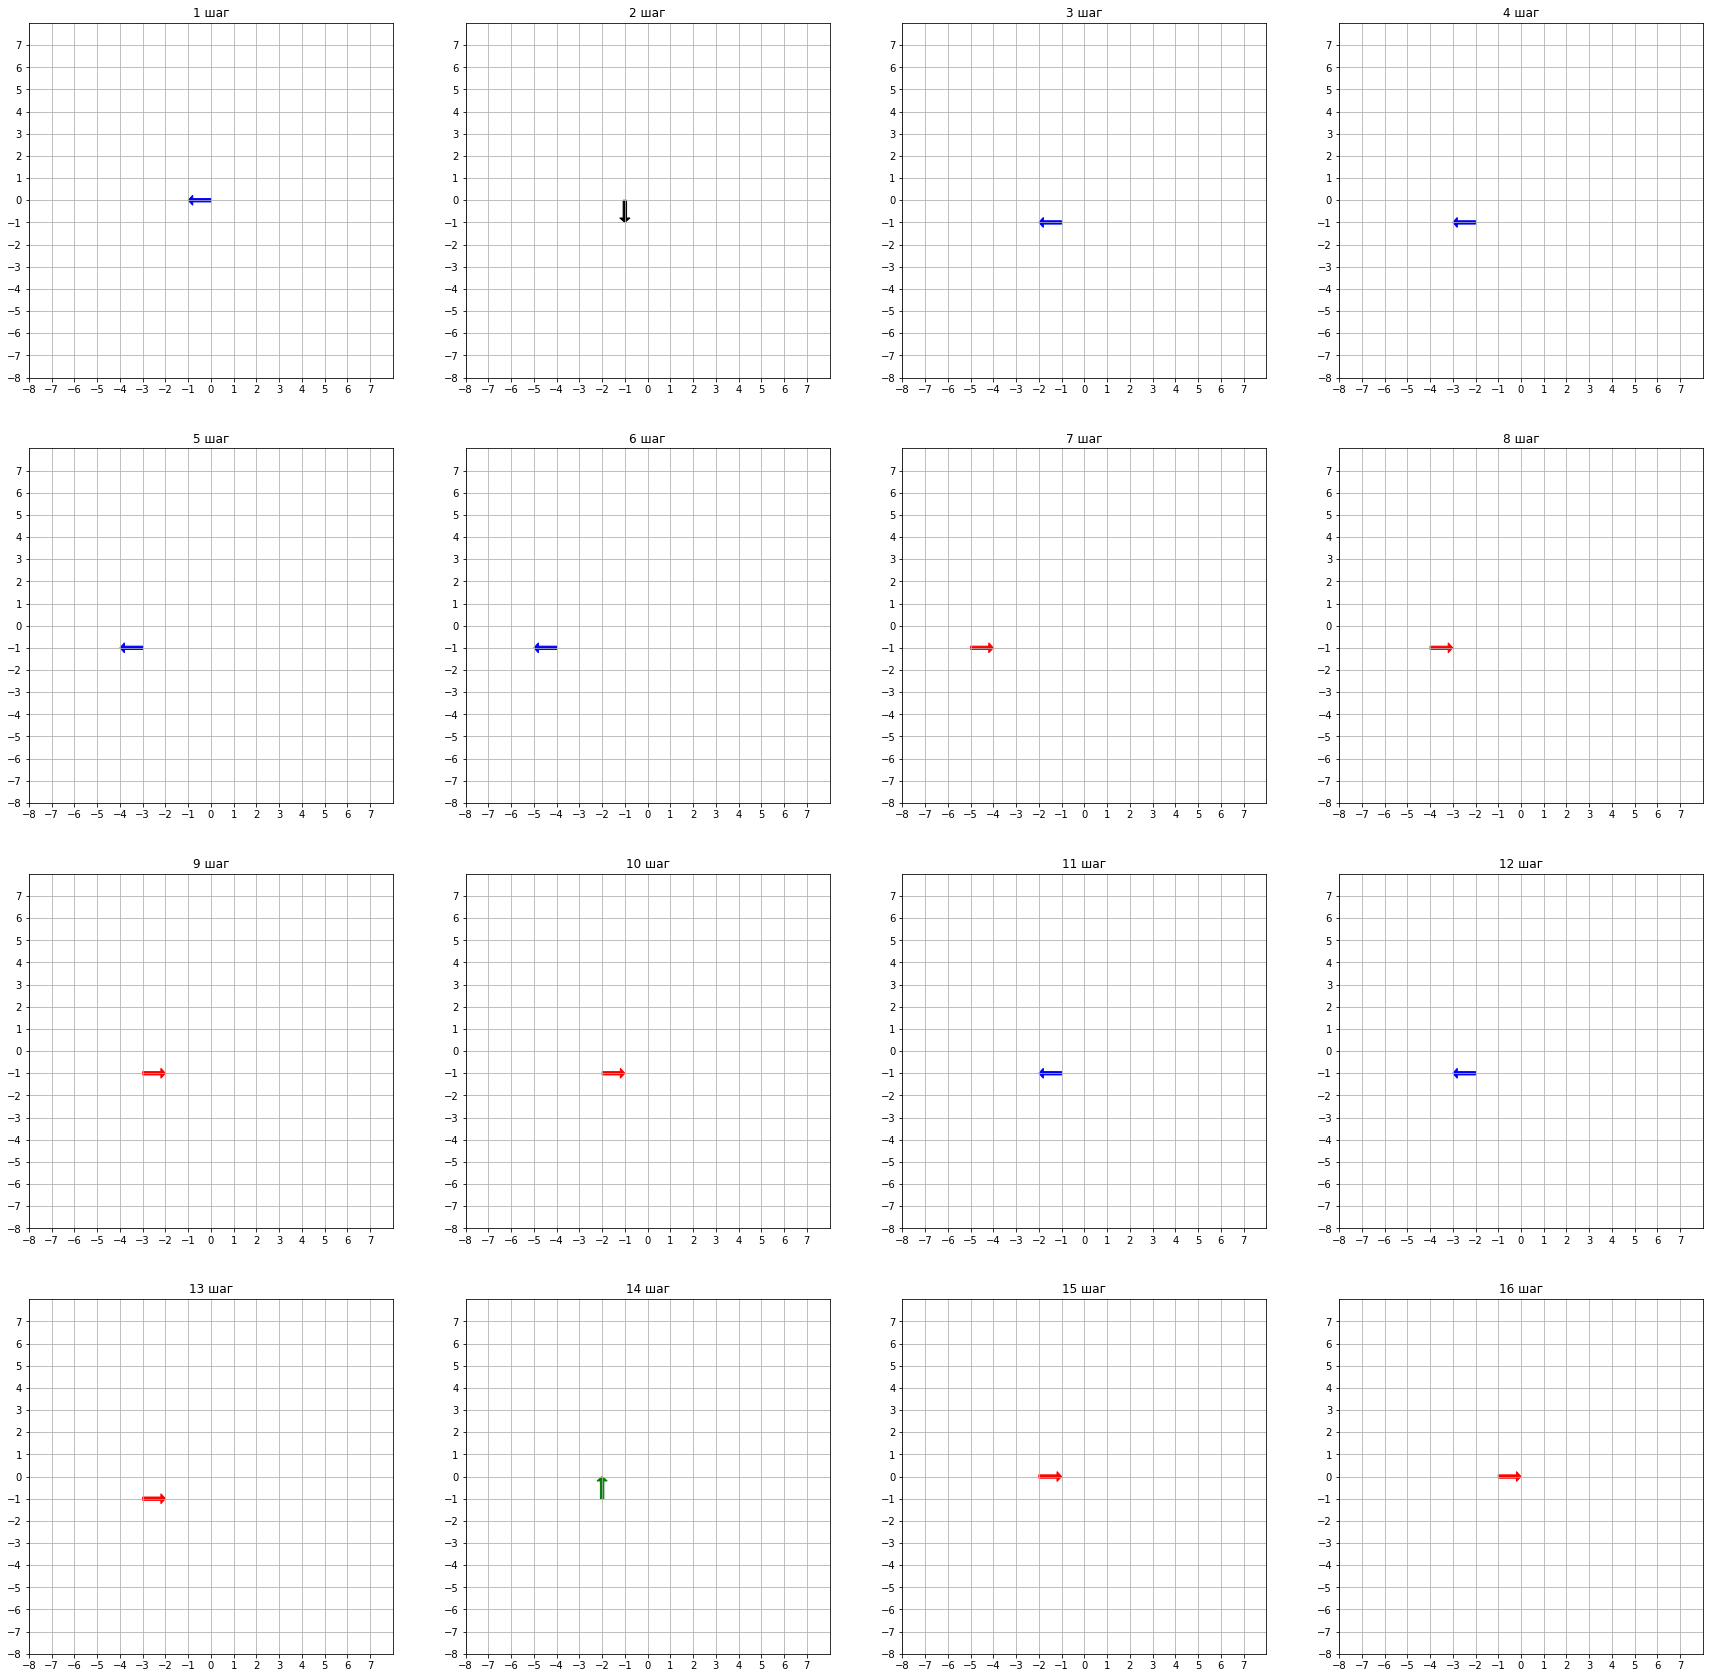

Количество шагов по горизонтали 14


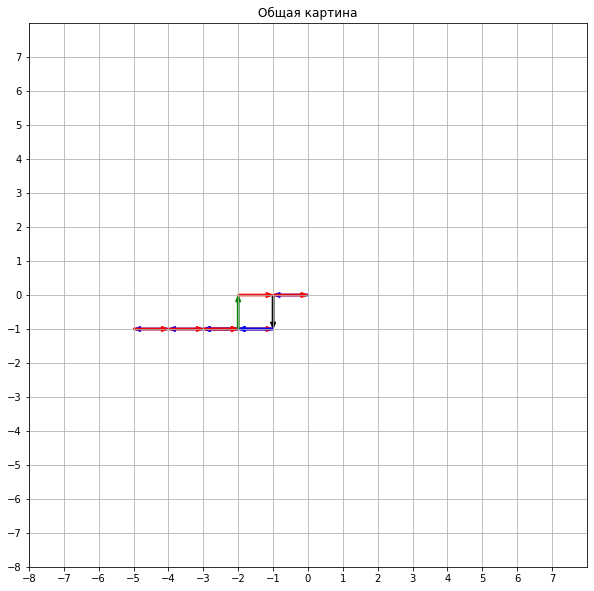

In [ ]:
#пример генерации для 16 шагов (для 100 очень долгая отрисовка)

x = 0

y = 0

n = int(np.random.default_rng().uniform(0,8,1))


NoB = [n, n, 8 - n, 8 - n]

tr = []

for i in range(16):
  u = np.random.default_rng().uniform(0,16-i,1)
  
  if u <= NoB[0]:
    tr.append(0)
    NoB[0] = NoB[0] - 1
  elif NoB[0] < u <= NoB[0] + NoB[1]:
    tr.append(1)
    NoB[1] = NoB[1] - 1
  elif NoB[0] + NoB[1] < u <= NoB[0] + NoB[1] + NoB[2]:
    tr.append(2)
    NoB[2] = NoB[2] - 1
  elif NoB[0] + NoB[1] + NoB[2] < u <= NoB[0] + NoB[1] + NoB[2] + NoB[3]:
    tr.append(3)
    NoB[3] = NoB[3] - 1
  else:
    print("check")


figure, axis = plt.subplots(4, 4, figsize=(30, 30))



ticks = np.arange(-8, 8, 1)

for i in range(4*4):
  if tr[i] == 0:
    axis[i//4, i%4].set_xlim([-8,8])
    axis[i//4, i%4].set_ylim([-8,8])
    axis[i//4, i%4].set_xticks(ticks)
    axis[i//4, i%4].set_yticks(ticks)
    axis[i//4, i%4].grid()
    axis[i//4, i%4].arrow(x,y,0.8,0, width = 0.15, head_length = 0.2, color = "red")
    axis[i//4, i%4].set_title(f"{i+1} шаг")

    x = x + 1
  
  elif tr[i]  == 1:
    axis[i//4, i%4].set_xlim([-8,8])
    axis[i//4, i%4].set_ylim([-8,8])
    axis[i//4, i%4].set_xticks(ticks)
    axis[i//4, i%4].set_yticks(ticks)
    axis[i//4, i%4].grid()
    axis[i//4, i%4].arrow(x,y,-0.8,0, width = 0.15, head_length = 0.2, color = "blue")
    axis[i//4, i%4].set_title(f"{i+1} шаг")

    x = x - 1

  elif tr[i]  == 2:
    axis[i//4, i%4].set_xlim([-8,8])
    axis[i//4, i%4].set_ylim([-8,8])
    axis[i//4, i%4].set_xticks(ticks)
    axis[i//4, i%4].set_yticks(ticks)
    axis[i//4, i%4].grid()
    axis[i//4, i%4].arrow(x,y,0,0.8, width = 0.15, head_length = 0.2, color = "green")
    axis[i//4, i%4].set_title(f"{i+1} шаг")

    y = y + 1

  elif tr[i]  == 3:
    axis[i//4, i%4].set_xlim([-8,8])
    axis[i//4, i%4].set_ylim([-8,8])
    axis[i//4, i%4].set_xticks(ticks)
    axis[i//4, i%4].set_yticks(ticks)
    axis[i//4, i%4].grid()
    axis[i//4, i%4].arrow(x,y,0,-0.8, width = 0.15, head_length = 0.2, color = "black")
    axis[i//4, i%4].set_title(f"{i+1} шаг")

    y = y - 1

plt.show()

x = 0
y = 0

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_xlim(-8,8)

ax.set_ylim(-8,8)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid()
ax.set_title(f"Общая картина")
for i in range(4*4):
  if tr[i] == 0:

    ax.arrow(x,y,0.8,0, width = 0.05, head_length = 0.2, color = "red")

    x = x + 1
  
  elif tr[i]  == 1:

    ax.arrow(x,y,-0.8,0, width = 0.05, head_length = 0.2, color = "blue")


    x = x - 1

  elif tr[i]  == 2:

    ax.arrow(x,y,0,0.8, width = 0.05, head_length = 0.2, color = "green")

    y = y + 1

  elif tr[i]  == 3:
    ax.arrow(x,y,0,-0.8, width = 0.05, head_length = 0.2, color = "black")

    y = y - 1

print(f"Количество шагов по горизонтали {2*n}")

In [ ]:
tr

[1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0]

# Задача про разбиение на подмножества

In [ ]:
n = 10

S = list(range(n))

print(f"Данное множество -- {S}")

Данное множество -- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
sets = []
k = int(np.random.default_rng().uniform(1,n,1))
for i in range(k):
  cur_set = []
  m = int(np.random.default_rng().uniform(1,n-(k-i)+1,1))
  for j in range(m):
    p = int(np.random.default_rng().uniform(0,n-1,1))
    cur_set.append(S[p])
    S.pop(p)
    n = n - 1
  sets.append(cur_set)
sets.append(S)

In [ ]:
print(f"Разбиение -- {sets}")

Разбиение -- [[8, 4, 5], [7, 0, 1], [6], [2], [3], [9]]
